## Human Development Index

The Human Development Index (HDI) is an index used by the UN to measure the progression of human development around the world. Two of the key aspects they look at are:

1. Life expectancy
2. Gross National Income per capita (adjusted for the price level of the country).

We're going to take a look at some of the data for this and perform some analyses using some more advanced techniques from the `pandas` and `numpy` libraries.

We'll begin by loading in the libraries, and taking a look at the life expectancy data.

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

life_expectancy  = pd.read_csv('data/life-expectancy.csv')

life_expectancy.head(5)

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350


**1. Create a pivot table so that there is one column per year, and only one row per country, with the values in each cell being the life expectancy. The rows should be ordered alphabetically.**

Store the answer in a variable called `pivot`.

AttributeError: 'Series' object has no attribute 'sort'

In [8]:
# Add your code below
#Pivot the dataframe on year
pivot = life_expectancy.pivot(index = "Entity", columns = "Year", values="Life expectancy")
pivot

Year,1543,1548,1553,1558,1563,1568,1573,1578,1583,1588,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.028,61.553,62.054,62.525,62.966,63.377,63.763,64.130,64.486,64.833
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.576,59.263,59.914,60.527,61.093,61.607,62.064,62.472,62.839,63.170
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.562,76.914,77.252,77.554,77.813,78.025,78.194,78.333,78.458,78.573
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.938,75.199,75.436,75.661,75.878,76.090,76.298,76.499,76.693,76.880
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.126,73.295,73.419,73.506,73.559,73.588,73.609,73.636,73.679,73.745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.372,67.797,68.196,68.565,68.904,69.213,69.496,69.762,70.017,70.263
World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.934,70.320,70.690,71.039,71.364,71.661,71.928,72.169,72.386,72.584
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.549,65.768,65.920,66.016,66.066,66.085,66.087,66.086,66.096,66.125


**2. How many years contain NaNs and how many do not?**

On the pivot table, check which entries contain NaNs using `.isnull()`. You can then use `.any()` to get a single boolean value for a whole column (indicating whether *any* value in that column is False). Use `.value_counts()` to get counts for True and False. Assign the output of `.value_counts()` to a variable called `num_nans`.


In [15]:
# Add your code below
num_nans = pivot.isnull().any().value_counts()
num_nans

True     241
False     70
dtype: int64

**3. Using similar logic, return a boolean which indicates whether any row in 2019 contains a NaN.**

Store the result in a variable named `nan_in_2019`.

In [21]:
# Add your code below
nan_in_2019 = pivot[2019].isnull().sum() > 0
nan_in_2019

False

**4. Using `.groupby`, show the `mean` life expectancy throughout the world for each year.**

Store the resulting dataframe in a variable named `year_vs_life_exp`.

In [24]:
# Add your code below
year_vs_life_exp = life_expectancy.groupby("Year")["Life expectancy"].mean()
year_vs_life_exp


Year
1543    33.939999
1548    38.820000
1553    39.590000
1558    22.379999
1563    36.660000
          ...    
2015    72.930884
2016    73.182383
2017    73.414522
2018    73.630619
2019    73.832989
Name: Life expectancy, Length: 311, dtype: float64

Once you have implemented `year_vs_life_exp`, we can uncomment the cell below and visualise the trend for this data:

<AxesSubplot: xlabel='Year'>

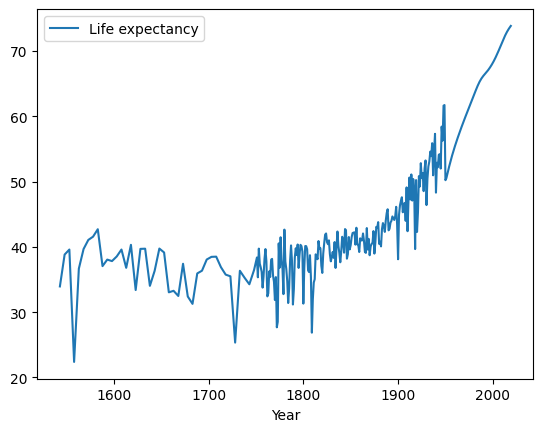

In [25]:
year_vs_life_exp.reset_index().plot('Year','Life expectancy')

**5. `melt` the dataframe `pivot` into a table with an index and three columns: Entity, Year, Life expectancy. Assign this to a variable called `melted_pivot`**


*Hint: you may need to use `.reset_index()` to make 'Entity' indexable again.*

In [30]:
# Add your code below
# Melting the pivot table

melted_pivot = pd.melt(pivot.reset_index(), id_vars = "Entity", value_name = "Life expectancy")
melted_pivot

,Entity,Year,Life expectancy
0,Afghanistan,1543,NaN
1,Africa,1543,NaN
2,Albania,1543,NaN
3,Algeria,1543,NaN
4,American Samoa,1543,NaN
...,...,...,...
75568,Western Sahara,2019,70.263
75569,World,2019,72.584
75570,Yemen,2019,66.125
75571,Zambia,2019,63.886


## Gross National Income per capita

Let's take a look at the GNI data:

In [31]:
gni_per_capita = pd.read_csv('data/gross-national-income-per-capita.csv')
gni_per_capita.head(5)

,Entity,Code,Year,"GNI per capita, PPP (constant 2011 international $)"
0,Afghanistan,AFG,2002,1061.366599
1,Afghanistan,AFG,2003,1097.601465
2,Afghanistan,AFG,2004,1063.819645
3,Afghanistan,AFG,2005,1138.095434
4,Afghanistan,AFG,2006,1167.882120


The problem is that it doesn't actually tell us population size. There's another dataframe with this data in it:

In [37]:
hihd = pd.read_csv('data/hihd-without-gdp-vs-gdp-per-capita.csv')
hihd.head(5)

,Entity,Code,Year,"Total population (Gapminder, HYDE & UN)",Continent,"Real GDP per capita in 2011US$, 2011 benchmark (Maddison Project Database (2018))",Historical Index of Human Development (without GDP metric)
0,Abkhazia,OWID_ABK,2015,NaN,Asia,NaN,NaN
1,Afghanistan,AFG,1800,3280000.0,NaN,NaN,NaN
2,Afghanistan,AFG,1801,3280000.0,NaN,NaN,NaN
3,Afghanistan,AFG,1802,3280000.0,NaN,NaN,NaN
4,Afghanistan,AFG,1803,3280000.0,NaN,NaN,NaN


**6. Create a new column called 'Population' in `gni_per_capita` which is filled with `np.nan`s.**

In [33]:
# Add your code below
gni_per_capita["Population"] = np.nan


Make a list called `popns` which has the correct population value for each row of the dataframe.

To achieve this, you will need to use information from both the `hihd` and the `gni_per_capita` dataframes:
  1. First, get a unique list of countries from `gni_per_capita` (specifically, the `Entity` column). 
  2. Iterate through this list and, on each iteration:
     - Retrieve the `Year` column from `gni_per_capita` for that country. Assign it to a variable called `years`
     - Get the rows containing the total population from the `hihd` dataframe for that country and those `years` (the `Total population (Gapminder, HYDE & UN)` column)
     - If the number of rows for the two above dataframe slices are equal, add the population values to the `popns` list
     - Otherwise, add as many `np.nan`s to the `popns` list as there are items in `years`
     
The idea here is to add population data where it matches the country and year. However, if we find a mismatch in the number of years of data for any given country, we discard all population data from `hihd` and just add null values (`np.nan`) for all the years of data we have for that country in `gni_per_capita`.

In [38]:
# Join the two dataframes together
hihd_gni = pd.concat([hihd, gni_per_capita], sort = False)
hihd_gni

,Entity,Code,Year,"Total population (Gapminder, HYDE & UN)",Continent,"Real GDP per capita in 2011US$, 2011 benchmark (Maddison Project Database (2018))",Historical Index of Human Development (without GDP metric),"GNI per capita, PPP (constant 2011 international $)",Population
0,Abkhazia,OWID_ABK,2015,NaN,Asia,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1800,3280000.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1801,3280000.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1802,3280000.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1803,3280000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4619,Zimbabwe,ZWE,2013,NaN,NaN,NaN,NaN,1695.604883,NaN
4620,Zimbabwe,ZWE,2014,NaN,NaN,NaN,NaN,1700.869617,NaN
4621,Zimbabwe,ZWE,2015,NaN,NaN,NaN,NaN,1678.138612,NaN
4622,Zimbabwe,ZWE,2016,NaN,NaN,NaN,NaN,1677.424884,NaN


Now we should be able to fill this `Population` column in properly and inspect the dataframe:

**7. Let's take a closer look at the year 2011 (since that's where our GNI per capita data comes from).**

 - Use `gni_per_capita.loc[...]` to sample only the rows from `gni_per_capita` where the `Year` equals 2011. It may be useful to create a mask. Assign this output to a variable called `df`

 - Since we actually have quite a few countries here, visualising all of them at the same time might look a bit cluttered. To filter down the contents of `df`, use the Python slice operator (`::`) with a step-size of 10 to reduce the number of rows in `df`.

 - Next, let's do some cleaning up of our dataframe: use the `.dropna()` and `.reset_index(drop=True)` functions to remove unwanted data and wipe the `df` index (remember to reassign your `df` variable to the results of these functions)

 - Note that you should make use of the `.copy()` method when defining `df`. The sample code below provides some guidance as to how this should look.

In [ ]:
# Add your code here
# df = gni_per_capita.loc[...].copy()


**8. Create a new DataFrame as a `.copy()` of `df` and call it `df_life_expectancy`. Add a new column 'Life expectancy' to `df_life_expectancy`, taken from the `life_expectancy` dataframe (from the year 2011).**

In [ ]:
# Add your code here...
# df_life_expectancy = df.copy()


Now we're going to use the function `plot_blobs` below to visualise the data:

In [ ]:
# df: the DataFrame to plot
# s: a list of sizes for each blob
def plot_blobs(df, s):
    fig, ax = plt.subplots(figsize=(10,5))

    gni = 'GNI per capita, PPP (constant 2011 international $)'
    df.plot('Life expectancy', gni, kind='scatter',ax=ax,alpha=0.5,s=s) # s = <array> sets the size of each blob 

    for i,(k, v) in enumerate(df.sort_values('Life expectancy').iterrows()):
        if i % 2 == 0: # annotate every other country
            ax.annotate(v['Entity'],(v['Life expectancy'], v[gni]))

**9. Scale each blob by their population.**

Create a list `s` which contains the sizes. Assume `100` is the size for the smallest population, and then scale the others by their ratio to the smallest. For example, if country A is the smallest then their size should be 100. If country B has double the population, their size should be 200.

Don't worry about overlapping text. If you're curious, you can check out the [adjustText](https://github.com/Phlya/adjustText) library for matplotlib - but since this is unrelated to pandas and numpy we'll omit it for now.

In [ ]:
# Add your code below
# s = ...


The following call should now produced a nicely scaled plot:

In [ ]:
# plot_blobs(df_life_expectancy, s);

**10. Use `qcut` to create three population size groups ["Small","Medium","Large"].**

First create a new Dataframe called `df_category` as a `.copy()` of `df_life_expectancy`. Then assign the output of `qcut` to a new column in `df_category` called `Popn. category`.

In [ ]:
# Add your code below
# df_category = df_life_expectancy.copy()
# df_category['Popn. category'] = ...


**11. Create a new DataFrame from `df_category` called `df_multi_index` so it has a row MultiIndex over each category.**  

You should start by creating `df_multi_index` as a `.copy()` of `df_category`

*Hint: `pivot` creates a column MultiIndex. `stack` converts a column MultiIndex into a row MultiIndex.*


In [ ]:
# Add your code below
# df_multi_index = df_category.copy()
# df_multi_index = ...


**12. Use `.loc` to get a sub-dataframe of countries in the Medium category.**

Assign it to a variable called `df_medium`

In [ ]:
# Add your code here
# df_medium = df_multi_index.loc[...]
